In [1]:
#import libraries
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [15]:
#setup data path
file_path = Path("Resources/crypto_data.csv")
crypto_df = pd.read_csv(file_path)
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [16]:
#drop excess columns and data
crypto_df = crypto_df.drop('Unnamed: 0', axis=1)
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1247,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [17]:
#drop excess columns and data
crypto_df = crypto_df[crypto_df['IsTrading']==True]
crypto_df = crypto_df.drop(columns = "IsTrading")
crypto_df = crypto_df.drop(columns = "CoinName")
crypto_df = crypto_df.dropna()
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [19]:
#drop excess columns and data
crypto_df = crypto_df[crypto_df["TotalCoinsMined"] > 0]
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [22]:
X = pd.get_dummies(crypto_df, columns = ["Algorithm", "ProofType"])

X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
scale = StandardScaler()
scaled_crypto = scale.fit_transform(X)

In [26]:
pca = PCA(n_components = 0.90)
pca_transform = pca.fit_transform(scaled_crypto)

In [27]:
pca_transform = pd.DataFrame(
    data=pca_transform)
pca_transform

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-1.542637e-14,-1.165476e-11,1.940305e-14,-0.007129,-1.319756,-0.051813,...,6.791870e-16,3.244575e-16,-1.011010e-15,-2.982695e-15,-1.731974e-15,5.284002e-15,-1.924284e-15,3.781938e-15,-4.015154e-16,2.426681e-16
1,-0.318434,1.032331,-0.591126,0.001386,-1.526824e-14,-1.155975e-11,1.957805e-14,-0.007739,-1.322514,-0.056674,...,-4.586593e-16,9.072591e-16,-2.269850e-15,-2.263852e-15,-2.660612e-15,7.651009e-15,-1.525656e-15,3.355866e-15,-5.762231e-16,5.071767e-18
2,2.305468,1.656383,-0.683617,0.004731,-1.478301e-14,-3.949449e-11,3.759289e-14,-0.054781,-1.542879,-0.943951,...,1.780031e-14,-4.989842e-14,4.825798e-14,3.187038e-14,3.098898e-14,-9.932864e-14,-3.553773e-14,-7.367435e-14,3.182511e-14,-1.967865e-14
3,-0.145184,-1.320593,0.192813,-0.001229,3.751275e-15,1.025361e-11,-9.093496e-15,-0.002071,0.281463,0.251862,...,1.280944e-15,-1.279970e-15,8.288230e-15,2.691578e-15,-4.122980e-15,-1.425553e-14,-3.198069e-15,-1.367220e-14,6.083623e-15,-1.688258e-14
4,-0.151768,-2.036192,0.396182,-0.001705,1.616118e-14,1.423168e-11,-1.198958e-14,0.027735,0.519099,0.188820,...,-6.092554e-16,1.358936e-14,7.275832e-14,-8.776375e-14,-7.938475e-14,-6.460819e-14,3.930429e-14,-7.474587e-14,1.316774e-13,-2.987009e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,1.623380e-14,6.872581e-11,5.141389e-14,-0.851713,2.041159,3.560713,...,1.218205e-15,-1.449422e-15,9.911619e-15,4.436272e-15,-6.710247e-15,-1.345905e-14,-4.241955e-15,-1.685543e-14,7.950476e-15,-1.935251e-14
528,-0.333144,1.032071,-0.590740,0.001399,-1.532967e-14,-1.167422e-11,1.945274e-14,-0.007154,-1.320125,-0.052460,...,5.698098e-16,5.301800e-16,-1.290781e-15,-3.016578e-15,-1.997892e-15,5.775262e-15,-1.613871e-15,3.598621e-15,-3.561618e-16,3.229973e-16
529,0.324349,-2.312308,0.421515,-0.001319,8.990310e-15,1.100148e-11,-1.472614e-14,0.017309,0.161077,-0.047787,...,6.832651e-16,2.667585e-14,1.800770e-14,-1.422684e-14,-1.584466e-15,-3.028768e-14,-5.129730e-15,-1.989494e-14,3.429631e-14,-6.676998e-14
530,-0.149364,-2.049336,0.412968,-0.001745,8.560997e-15,1.455604e-11,-1.932594e-14,0.028954,0.544389,0.233373,...,1.119931e-15,-1.584814e-15,-3.069177e-15,-1.038013e-15,1.530849e-16,7.096728e-16,-2.087867e-15,1.030302e-15,2.194970e-15,-6.636283e-16


In [31]:
tsne = TSNE(learning_rate = 250)
tsne_features = tsne.fit_transform(pca_transform)
tsne_features.shape

(532, 2)

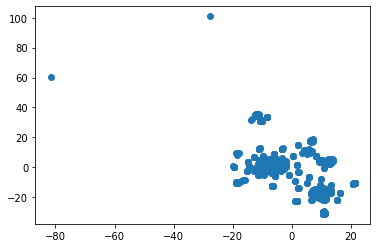

In [33]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [35]:
def get_clusters(k, data):
    model = KMeans(n_clusters=k, random_state=42)

    model.fit(data)

    predictions = model.predict(data)

    data["class"] = model.labels_

    return data

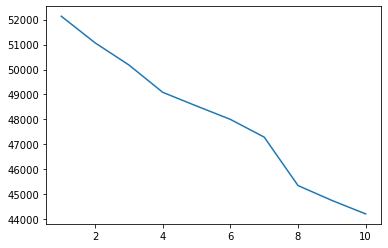

In [36]:
inertia = []

k = [1,2,3,4,5,6,7,8,9,10]

for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(scaled_crypto)
    inertia.append(km.inertia_)

elbow = {"k":k, "inertia":inertia}
elbow_df = pd.DataFrame(elbow)


#preview
plt.plot(elbow_df["k"], elbow_df["inertia"])
plt.show()

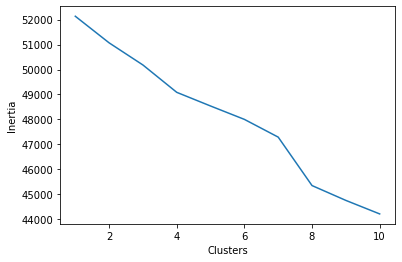

In [38]:
plt.plot(elbow_df["k"], elbow_df["inertia"])
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.show()